In [ ]:
#importing necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASET/sentimentdataset.csv")

[**1. When and who created the dataset?**<br>
](https://)


**2. How did you get access to the dataset?**<br>

> Indented block


This dataset was accessed from Kaggle, a platform that hosts diverse datasets and competitions related to data science and machine learning. <br>
The link to the dataset is given below:<br>
https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dat

**3. List out the attributes (columns) of the dataset.**<br>


1.  Sentiment
2.  Timestamp
3.'Timestamp'
4.'User'
5.'Platform'
6.'Hashtags
7.'Retweets
8.'Likes'
9.'Country'
10.Year'
11.'Month'
12.'Day'
13.'Hour'

In [ ]:
#printing the columns of the dataset
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
#calculate the total memory usage of the dataset, with deep memory usage.
total_memory = df.memory_usage(deep=True).sum()

#finding number of rows and columns in the dataset
num_rows, num_cols = df.shape

#calculates total number of elements
size = df.size

print("Number of Rows: ", num_rows)
print("Number of Columns: ", num_cols)
print("The total datasize is ", size)
print("Total memory usage (bytes): ",total_memory)

Number of Rows:  732
Number of Columns:  15
The total datasize is  10980
Total memory usage (bytes):  484967


In [ ]:
#finding the data types of each column
data_type= df.dtypes
print("Data types of Each Column:")
print(data_type)

Data types of Each Column:
Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object


In [ ]:
#counting the total number of missing values for each column
missing_values = df.isnull().sum()
print("Missing values in Each Column:")
print(missing_values)

#counting the total missing values
total_missing_values = df.isnull().sum().sum()
print("Total Number of Missing values:", total_missing_values )

Missing values in Each Column:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64
Total Number of Missing values: 0


In [ ]:
#finding the duplicate values
duplicate_rows = df.duplicated()
# dropping the duplicate observations
dataset_no_duplicates = df.drop_duplicates()

#counting the number of duplicate values after removing duplicates
num_duplicates = df.duplicated().sum()
print(f" After removing duplicate values from the dataset, number of duplicate values is: {num_duplicates}")

# Display the first few rows of the updated dataset
print("\nFirst few rows of the updated dataset:")
dataset_no_duplicates.head()

 After removing duplicate values from the dataset, number of duplicate values is: 0

First few rows of the updated dataset:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
rows, columns = df.shape
# dataset.shape gives the new updated shape of the dataset
print("The total number of rows in the dataset after data cleaning is: ", rows ,"\n")
print("The total number of columns i.e features in the dataset after data cleaning is: ", columns ,"\n")

total_size = df.size
# dataset.size gives the total number of elements
print("Total size of the dataframe after data cleaning is: ", total_size ,"\n")

The total number of rows in the dataset after data cleaning is:  732 

The total number of columns i.e features in the dataset after data cleaning is:  15 

Total size of the dataframe after data cleaning is:  10980 



In [ ]:
print("Numeric columns:")
#extracts the columns with numeric data types
df.select_dtypes(include=['number'])

Numeric columns:


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
0,0,0,15.0,30.0,2023,1,15,12
1,1,1,5.0,10.0,2023,1,15,8
2,2,2,20.0,40.0,2023,1,15,15
3,3,3,8.0,15.0,2023,1,15,18
4,4,4,12.0,25.0,2023,1,15,19
...,...,...,...,...,...,...,...,...
727,728,732,20.0,39.0,2017,8,18,18
728,729,733,25.0,48.0,2018,6,22,14
729,730,734,22.0,42.0,2019,4,5,17
730,731,735,21.0,43.0,2020,2,29,20


In [ ]:
print("Categorical columns:")
#extracting the columns that exclude numeric data type
df.select_dtypes(exclude=['number'])

Categorical columns:


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,Australia
...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,UK
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,USA
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,Canada
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,UK


In [ ]:
#calculate the total memory usage of the dataset, with deep memory usage.
total_memory = df.memory_usage(deep=True).sum()

#finding number of rows and columns in the dataset
num_rows, num_cols = df.shape

#calculates total number of elements
size = df.size

print("Number of Rows: ", num_rows)
print("Number of Columns: ", num_cols)
print("The total datasize is ", size)
print("Total memory usage (bytes): ",total_memory)

Number of Rows:  732
Number of Columns:  15
The total datasize is  10980
Total memory usage (bytes):  484967


In [ ]:
#finding the data types of each column
data_type= df.dtypes
print("Data types of Each Column:")
print(data_type)

Data types of Each Column:
Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object


**Missing Values**<br>
The total number of missing values is 2563.

In [ ]:
#counting the total number of missing values for each column
missing_values = df.isnull().sum()
print("Missing values in Each Column:")
print(missing_values)

#counting the total missing values
total_missing_values = df.isnull().sum().sum()
print("Total Number of Missing values:", total_missing_values )

Missing values in Each Column:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64
Total Number of Missing values: 0


**Data Cleaning**

In [ ]:
#replacing the columns with appropriate measures
columns_with_missing_values = df.columns[df.isnull().any()]

for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

final_missing_values = df.isnull().sum().sum()
print("Total Number of Missing values after filling missing values :", final_missing_values )

Total Number of Missing values after filling missing values : 0


**Duplicate Values**

In [ ]:
#finding the duplicate values
duplicate_rows = df.duplicated()
# dropping the duplicate observations
dataset_no_duplicates = df.drop_duplicates()

#counting the number of duplicate values after removing duplicates
num_duplicates = df.duplicated().sum()
print(f" After removing duplicate values from the dataset, number of duplicate values is: {num_duplicates}")

# Display the first few rows of the updated dataset
print("\nFirst few rows of the updated dataset:")
dataset_no_duplicates.head()

 After removing duplicate values from the dataset, number of duplicate values is: 0

First few rows of the updated dataset:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


**After data cleaning**

In [ ]:
rows, columns = df.shape
# dataset.shape gives the new updated shape of the dataset
print("The total number of rows in the dataset after data cleaning is: ", rows ,"\n")
print("The total number of columns i.e features in the dataset after data cleaning is: ", columns ,"\n")

total_size = df.size
# dataset.size gives the total number of elements
print("Total size of the dataframe after data cleaning is: ", total_size ,"\n")

The total number of rows in the dataset after data cleaning is:  732 

The total number of columns i.e features in the dataset after data cleaning is:  15 

Total size of the dataframe after data cleaning is:  10980 



**Summary Statistics**<br>
**Splitting dataset into numeric column and categorical column**

In [ ]:
print("Numeric columns:")
#extracts the columns with numeric data types
df.select_dtypes(include=['number'])

Numeric columns:


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
0,0,0,15.0,30.0,2023,1,15,12
1,1,1,5.0,10.0,2023,1,15,8
2,2,2,20.0,40.0,2023,1,15,15
3,3,3,8.0,15.0,2023,1,15,18
4,4,4,12.0,25.0,2023,1,15,19
...,...,...,...,...,...,...,...,...
727,728,732,20.0,39.0,2017,8,18,18
728,729,733,25.0,48.0,2018,6,22,14
729,730,734,22.0,42.0,2019,4,5,17
730,731,735,21.0,43.0,2020,2,29,20


In [ ]:
print("Categorical columns:")
#extracting the columns that exclude numeric data type
df.select_dtypes(exclude=['number'])

Categorical columns:


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,Australia
...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,UK
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,USA
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,Canada
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,UK


**For numeric column** <br>
Finding min., max., range, mean, median, variance and standard deviation

In [ ]:
#provides summary of key statistical measures
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


**Obervation**<br>
1. Retweets range from 5 to 40, averaging around 21.51.
2.Likes vary between 10 and 80, with an average of about 42.90.
3.The dataset shows diverse levels of engagement.
2. Low standard deviation for retweets and likes, indicating clustered data.
5.Minimum and maximum values provide insights into the dataset's range.
6.Percentiles give a sense of central tendency and spread.
3. No missing values; consistent count at 732 for each column.
8.Well-distributed data across years, months, days, and hours.

**For categorical columns:**<br>
Unique values

In [ ]:
categorical_columns = ['Country', 'Platform']

# Display unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print('\n' + '-' * 50 + '\n')

Unique values in 'Country':
[' USA      ' ' Canada   ' ' USA        ' ' UK       ' ' Australia '
 ' India    ' ' USA    ' 'USA' ' Canada    ' ' USA       ' ' USA '
 ' Canada  ' ' UK ' ' India     ' ' Canada ' ' UK        ' ' India '
 ' UK   ' ' UK         ' ' USA     ' ' Canada     ' ' USA          '
 ' India      ' ' Australia  ' ' UK           ' ' Canada       '
 ' Australia   ' ' Australia    ' ' UK            ' ' USA   '
 ' India       ' ' UK          ' ' USA  ' ' UK      ' ' Canada      '
 ' India   ' ' Canada          ' ' India        ' ' Australia     '
 ' Canada        ' ' India         ' ' USA           '
 ' USA               ' ' Canada            ' ' UK                '
 ' India              ' ' Australia          ' ' France            '
 ' Brazil            ' ' Japan             ' ' Greece            '
 ' India             ' ' Brazil           ' ' France           '
 ' Japan            ' ' Canada           ' ' Australia         '
 ' UK               ' ' USA             ' ' G

**Dataframe span**

**Data Visualization**<br>
**Univariate Analysis**

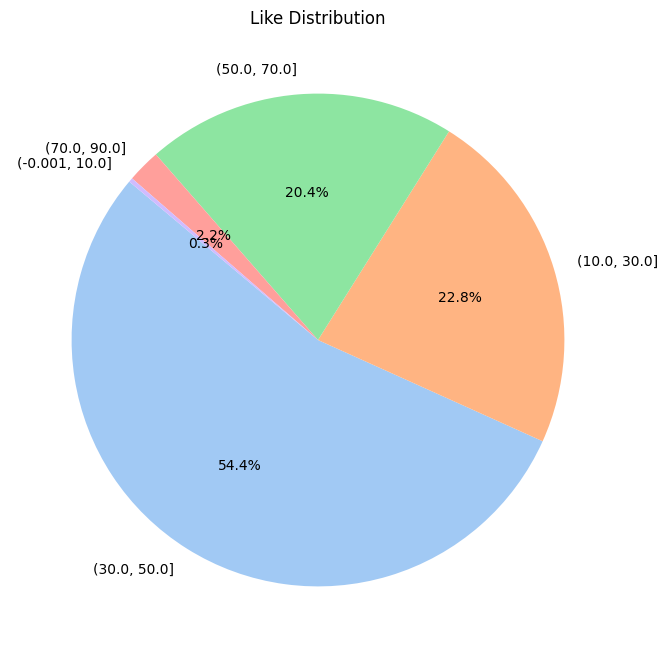

In [ ]:
like_data = df['Likes']

# Define the bins for life expectancy ranges
bins = [0, 10, 30, 50, 70, 90]


# Cut the data into bins and count the frequencies
like_bins = pd.cut(like_data, bins=bins, include_lowest=True)
like_counts = like_bins.value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(like_counts, labels=like_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title(f'Like Distribution')
plt.show()

The given piechart illustrates the distribution of likes. About 46.7% countries have life expectancy from 70-80, followed by 24.4% having 60-70 years life expectancy. Similarly, 15.9% have life expectancy 50-60 and 8.6% have 80-90. Only 4.3% people have 0-50 years of life expectancy

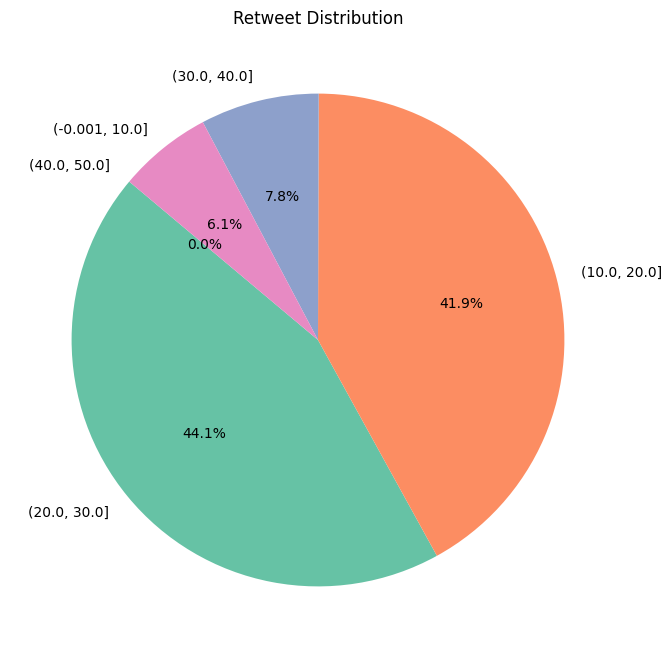

In [ ]:
bins = [0, 10, 20, 30, 40, 50]

retweet_data = df['Retweets']

# Cut the data into bins and categorize into GDP ranges
retweet_categories = pd.cut(retweet_data, bins=bins, include_lowest=True)

# Count the frequencies for each GDP range
retweet_counts = retweet_categories.value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set2')
plt.pie(retweet_counts, labels=retweet_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Retweet Distribution')
plt.show()

The given piechart shows the GDP distribution of 193 countries. About 84.5% countries have a low GDP of less than 10k. About 6.7 % have GDP between 10-20k, 3.3% have 20-30k GDP and 3% have 30k-40k GDP. Only about 2.4% countries have a high GDP of 40-50k.

**Skewness and Modality of Distribution**

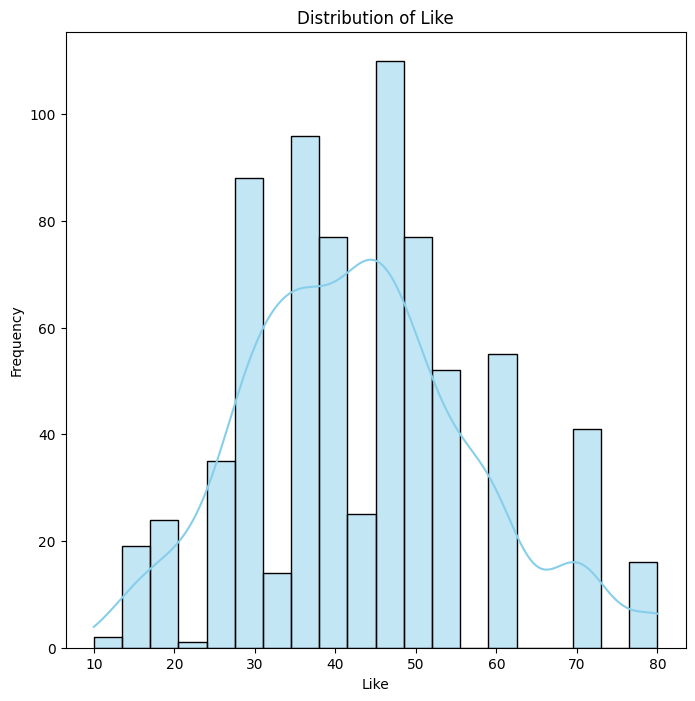

Skewness of Like distribution: 0.37813850875791316


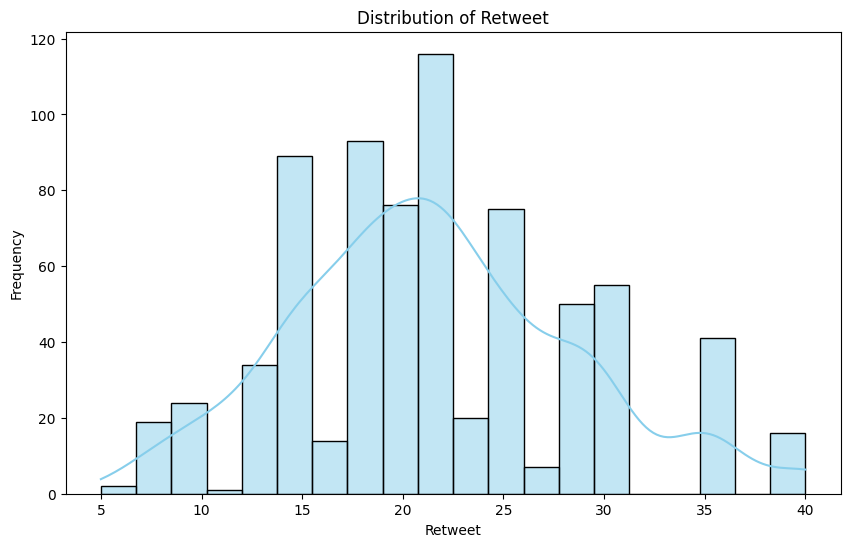

Skewness of GDP distribution: 0.36341226758224254


In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(like_data, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Like')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness = like_data.skew()
print("Skewness of Like distribution:", skewness)

plt.figure(figsize=(10, 6))
sns.histplot(retweet_data, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Retweet')
plt.xlabel('Retweet')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness =retweet_data.skew()
print("Skewness of GDP distribution:", skewness)

A negative skewness value of -0.63 for life expectancy indicates negative skewness, indicating that the distribution is skewed to the left.
 The tail on the left side of the distribution is longer or thicker than the tail on the right side.
 A positive skewness of 3.20 for GDP indicates that the distribution is skewed to the right.The tail on the right side of the distribution is longer or thicker than the tail on the left.Both figures show a bimodal distribution.

**Analyzing outliers**

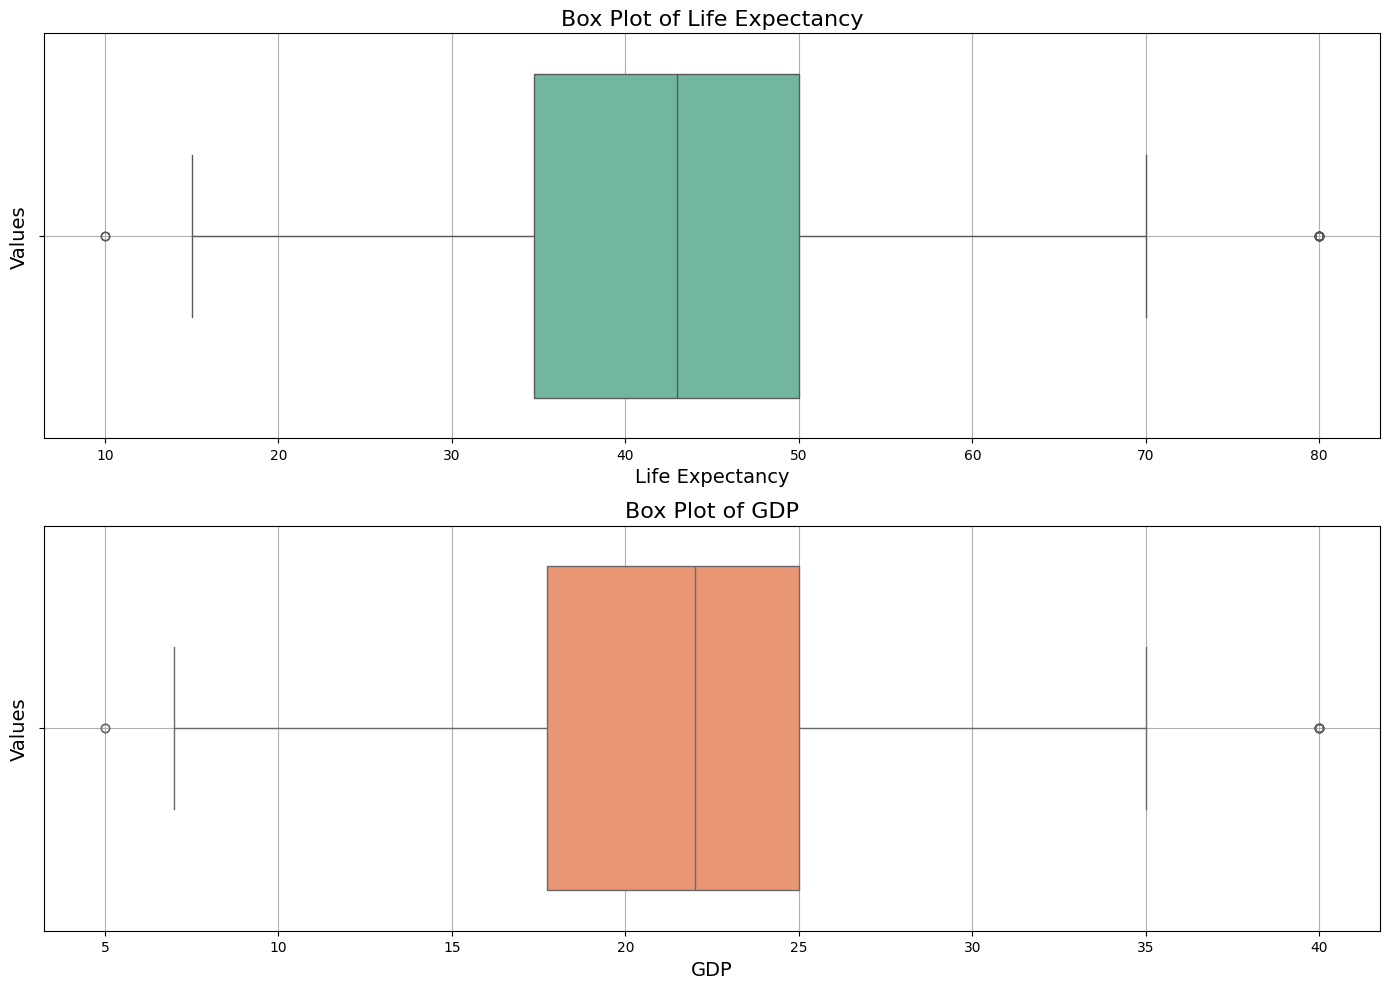

In [ ]:
custom_palette = sns.color_palette("Set2")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Plot box plots for Life Expectancy and GDP
sns.boxplot(x=like_data, ax=axes[0], color=custom_palette[0])
axes[0].set_title('Box Plot of Life Expectancy', fontsize=16)
axes[0].set_xlabel('Life Expectancy', fontsize=14)
axes[0].set_ylabel('Values', fontsize=14)
axes[0].grid(True)

sns.boxplot(x=retweet_data, ax=axes[1], color=custom_palette[1])
axes[1].set_title('Box Plot of GDP', fontsize=16)
axes[1].set_xlabel('GDP', fontsize=14)
axes[1].set_ylabel('Values', fontsize=14)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

The outliers in both the diagrams are prominent, which indicates that there is huge disparity in values.

**Bivariate Analysis**

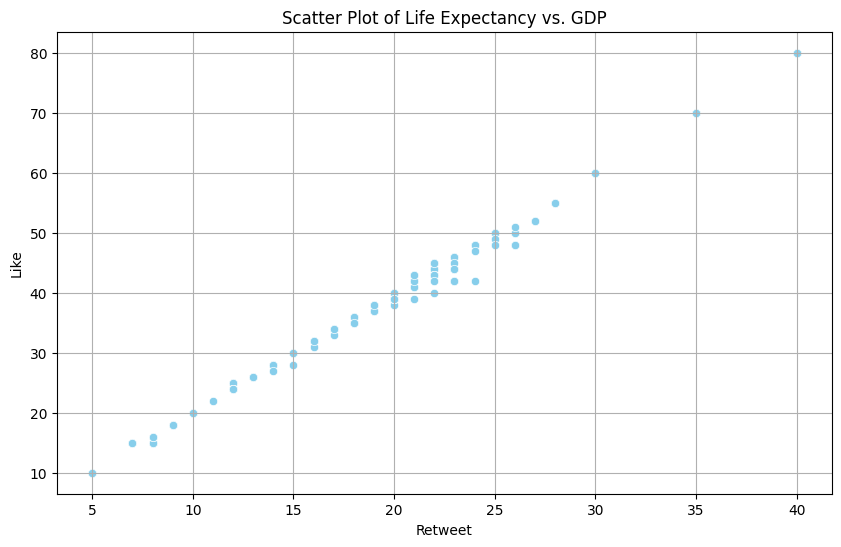

In [ ]:
# Create a scatter plot for Life Expectancy and GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x=retweet_data, y=like_data, color='skyblue')
plt.title('Scatter Plot of Life Expectancy vs. GDP')
plt.xlabel('Retweet')
plt.ylabel('Like')
plt.grid(True)
plt.show()

The scatter plot illustrates that countries with higher GDP from above 40k have higher life expectancy shown by the concentrated data points.

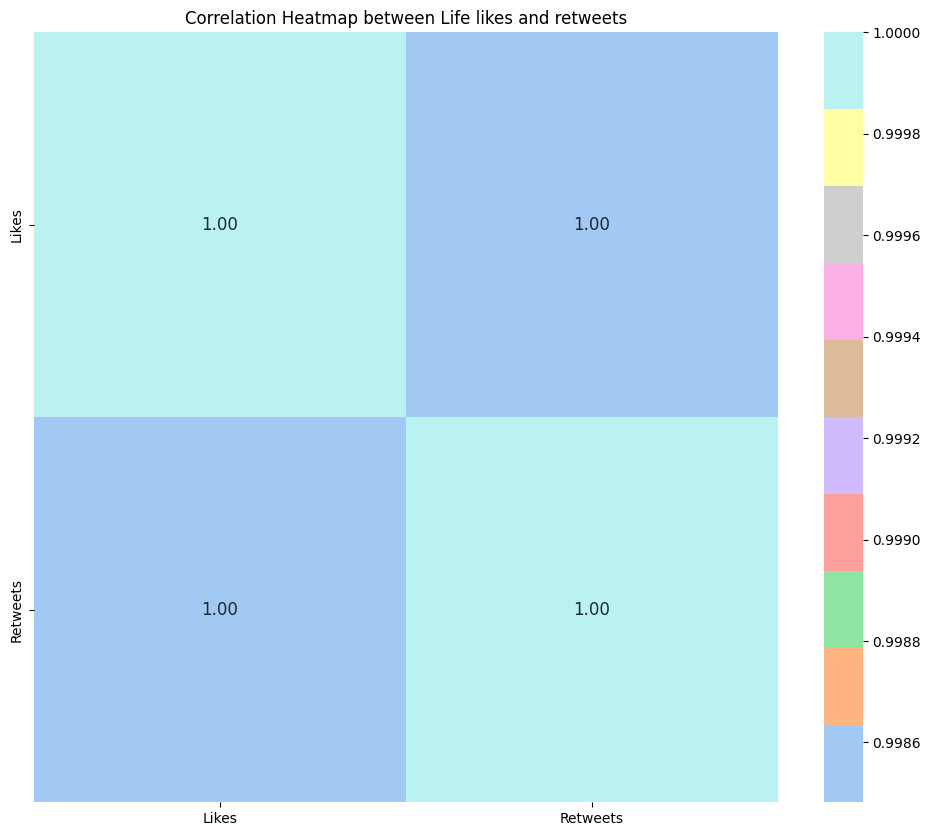

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[['Likes', 'Retweets']].corr()

custom_palette = sns.color_palette("pastel", as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap between Life likes and retweets')
plt.show()

The provided heatmap indicates a positive correlation between life expectancy and GDP. The 0.46 correlation coefficient indicates that as one variable grows, so does the other.

**Build Primary Model**<br>
**Splitting dataset into Train and Test Set**

In [ ]:
numeric_dataset = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values
clean_dataset = numeric_dataset.dropna()

# Separate features (X) and target variable (y)
X = clean_dataset.drop(columns=['Likes'])  # Features
y = clean_dataset['Likes']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build atleast two machine learning models for Regression Task**

**Decision Tree Regressor**

In [ ]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

**Evaluation of Decision Tree Regressor on Test Dataset**

In [ ]:
# Make predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Calculate evaluation metrics on the training set
train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5 # Calculate RMSE manually
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print the evaluation metrics for the training set
print("Training Set Metrics:")
print("Training Mean Absolute Error (MAE):", train_mae)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training R-squared (R2):", train_r2)

# Make predictions on the testing set
y_pred = decision_tree_model.predict(X_test)

# Calculate evaluation metrics on the testing set
test_rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Calculate RMSE manually
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for the testing set
print("\nTesting Set Metrics:")
print("Testing Mean Absolute Error (MAE):", test_mae)
print("Testing Root Mean Squared Error (RMSE):", test_rmse)
print("Testing R-squared (R2):", test_r2)

Training Set Metrics:
Training Mean Absolute Error (MAE): 0.0
Training Root Mean Squared Error (RMSE): 0.0
Training R-squared (R2): 1.0

Testing Set Metrics:
Testing Mean Absolute Error (MAE): 0.11564625850340136
Testing Root Mean Squared Error (RMSE): 0.5150787536377128
Testing R-squared (R2): 0.9987079602539456


**Random Forest Regressor**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluation of Random Forest Regressor on Test Dataset**

In [ ]:
# Predict on the training data
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model on the training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = mse_train_rf ** 0.5  # Calculate RMSE manually by taking the square root of MSE
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print("Training Set Metrics:")
print("Mean Absolute Error (Random Forest Regression):", mae_train_rf)
print("Root Mean Squared Error (Random Forest Regression):", rmse_train_rf)
print("R-squared (Random Forest Regression):", r2_train_rf)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Calculate RMSE manually by taking the square root of MSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Testing Set Metrics:")
print("Mean Absolute Error (Random Forest Regression):", mae_rf)
print("Root Mean Squared Error (Random Forest Regression):", rmse_rf)
print("R-squared (Random Forest Regression):", r2_rf)

Training Set Metrics:
Mean Absolute Error (Random Forest Regression): 0.06917948717948717
Root Mean Squared Error (Random Forest Regression): 0.21426439454382223
R-squared (Random Forest Regression): 0.9997651152621525
Testing Set Metrics:
Mean Absolute Error (Random Forest Regression): 0.11952380952380963
Root Mean Squared Error (Random Forest Regression): 0.3925228014521755
R-squared (Random Forest Regression): 0.9992496595127074


**Conclusion** <br>
The Random Forest Regressor outperformed all other models in my dataset.

**Hyper-parameter Optimization with Cross-Validation**

**For Decision Tree Model:**

In [ ]:
# Print the hyperparameters and their default values
print("Hyperparameters of Decision Tree model:")
print(decision_tree_model.get_params())

Hyperparameters of Decision Tree model:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


**Finding best hyper-parameter using GridSearch CV**

In [ ]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are already defined

best_params_dt = grid_search.best_params_
# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_dt_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params_dt)
print("Test Score (R^2):", test_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Score (R^2): 0.9988470444103553


**For Random Forest Regressor**

In [ ]:
# Print the hyperparameters and their default values
print("Hyperparameters of Linear Regression model:")
print(rf_model.get_params())

Hyperparameters of Linear Regression model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Finding best hyper-parameter using GridSearch CV**

In [ ]:
rf_model = RandomForestRegressor()

# Define the adjusted parameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10,20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}

# Create the GridSearchCV object with parallelization
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

best_params_rf = grid_search.best_params_
# Print the best hyperparameters found
print("Best Hyperparameters:", best_params_rf)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_rf_model.score(X_test, y_test)
print("Test Score (R^2):", test_score)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
Test Score (R^2): 0.9991405479220759


**Feature Selection**

In [ ]:
# Initialize Recursive Feature Elimination (RFE) with Decision Tree Regressor
rfe = RFE(estimator=decision_tree_model, n_features_to_select=5)
# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_dtm = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features_dtm)

Selected Features: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Retweets', 'Month', 'Day'], dtype='object')


In [ ]:
# Initialize Recursive Feature Elimination (RFE) with Random Forest Regressor
rfe = RFE(estimator=rf_model, n_features_to_select=5)
# Fit RFE to the data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfr = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features_rfr)

Selected Features: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Retweets', 'Day', 'Hour'], dtype='object')


**Final Model**

**Decision Tree Model**

In [ ]:
# Initialize the Decision Tree Regressor with the best hyperparameters
decision_tree_model = DecisionTreeRegressor(random_state=42, **best_params_dt)

# Fit the model to the training data using selected features
decision_tree_model.fit(X_train[selected_features_dtm], y_train)

# Predict on the test data
y_pred_dt = decision_tree_model.predict(X_test[selected_features_dtm])

#calculating rmse, mae and r2 score
rmse = mean_squared_error(y_test, y_pred_dt) ** 0.5  # Calculate RMSE manually by taking the square root of MSE
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Root Mean Squared Error: 0.4747226707872663
Mean Absolute Error: 0.11008530396285499
R-squared Score: 0.9989024898481756


**Random Forest Regressor**

In [ ]:
# Initialize the Random Forest Regressor with the best hyperparameters
rf_model = RandomForestRegressor(random_state=42, **best_params_rf)

# Fit the model to the training data using selected features
rf_model.fit(X_train[selected_features_rfr], y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test[selected_features_rfr])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calculate MSE without 'squared' parameter
rmse = mse_rf ** 0.5  # Calculate RMSE manually by taking the square root of MSE

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (MSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.1694753861686861
Root Mean Squared Error (MSE): 0.4050416734764145
R-squared (R2) Score: 0.9992010345140099


**Conclusion**

 To learn more about the essential features of the dataset, this model was first explored.To create the primary model, the data set was split into a training set and a test set, and a decision tree regressor model and a random forest regressor model were created. We evaluated the model based on test data and found that the Random Forest Regressor performed better compared to the Decision Tree model, with an MAE of 0.23 and an  R-squared value of 0.54.
 For further optimization, we used GridSearchCV for hyperparameter optimization of both models.<br>
 The MAE value of 0.25 for the decision tree model and 0.23 for the random forest regressor obtained after hyperparameter tuning demonstrate the effectiveness of this approach in improving model performance.<br>
 Additionally, feature selection was carried out, resulting in the identification of 5 significant characteristics. When the model was rebuilt with the best hyperparameters and selected features, the error values were reduced for both models.The rmse and r2 scores for Decision Tree were 0.36, 0.34, and 0.52, 0.46, respectively. This demonstrated that hyperparameter adjustment and feature selection play an important role in avoiding overfitting and enhancing model performance.